In [1]:
#importing required libraries
import pandas as pd
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt 
import seaborn as sns

#importing warning to suppress where needed
import warnings
warnings.filterwarnings('ignore')

In [4]:
#importing data from the file folder
a=pd.read_csv('/content/drive/MyDrive/News Classifier/train_news.csv')
news=pd.DataFrame(a)

#getting insights of data
news.head()

,Unnamed: 0,id,headline,written_by,news,label
0,0,9653,Ethics Questions Dogged Agriculture Nominee as...,Eric Lipton and Steve Eder,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,10041,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,David Waldstein,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,19113,Cotton to House: ’Do Not Walk the Plank and Vo...,Pam Key,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,6868,"Paul LePage, Besieged Maine Governor, Sends Co...",Jess Bidgood,"AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,7596,A Digital 9/11 If Trump Wins,Finian Cunningham,Finian Cunningham has written extensively on...,1


In [5]:
#shape of the dataset
news.shape

(20800, 6)

In [6]:
#dropping features not required
news.drop(['Unnamed: 0','id','written_by'],axis=1,inplace=True)

In [7]:
#dropping the null values and resetting the index
news.dropna(inplace=True)
news.reset_index(inplace=True)

In [8]:
#displaying the data for overview
news.head()

,index,headline,news,label
0,0,Ethics Questions Dogged Agriculture Nominee as...,"WASHINGTON — In Sonny Perdue’s telling, Geo...",0
1,1,U.S. Must Dig Deep to Stop Argentina’s Lionel ...,HOUSTON — Venezuela had a plan. It was a ta...,0
2,2,Cotton to House: ’Do Not Walk the Plank and Vo...,"Sunday on ABC’s “This Week,” while discussing ...",0
3,3,"Paul LePage, Besieged Maine Governor, Sends Co...","AUGUSTA, Me. — The beleaguered Republican g...",0
4,4,A Digital 9/11 If Trump Wins,Finian Cunningham has written extensively on...,1


In [9]:
#datatypes of each features present
news.dtypes

index        int64
headline    object
news        object
label        int64
dtype: object

In [10]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [11]:
#processing the data
for col in news.columns:
    if news[col].dtypes==object:
        
        news[col]=news[col].str.lower()
        

        # Replace all other characters with space
        news[col] = news[col].str.replace(r'[^a-zA-Z]',' ')

In [12]:
#removing punctuations and stopwords
import string
stop_words = set(stopwords.words('english'))
for col in news.columns:
    if news[col].dtypes==object:
        news[col]=news[col].str.translate(str.maketrans('', '', string.punctuation))
        news[col] = news[col].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [13]:
news

,index,headline,news,label
0,0,ethics questions dogged agriculture nominee ge...,washington sonny perdue telling georgians grow...,0
1,1,u must dig deep stop argentina lionel messi ne...,houston venezuela plan tactical approach desig...,0
2,2,cotton house walk plank vote bill cannot pass ...,sunday abc week discussing republican plan rep...,0
3,3,paul lepage besieged maine governor sends conf...,augusta beleaguered republican governor maine ...,0
4,4,digital trump wins,finian cunningham written extensively internat...,1
...,...,...,...,...
20198,20794,one police shift patrolling anxious america ne...,policing america today rib dinner paid strange...,0
20199,20796,albert pike european migrant crisis,rixon stewart november rixon stewart nov migra...,1
20200,20797,dakota access caught infiltrating protests inc...,posted eddie know dakota access pipeline prote...,1
20201,20798,stretch summer solstice new york times,officially summer society boutique society mem...,0


In [14]:
#getting the ratio of fake and genuine news
news['label'].value_counts()

0    10387
1     9816
Name: label, dtype: int64

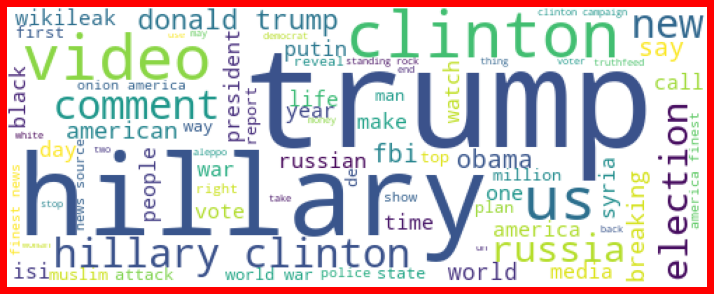

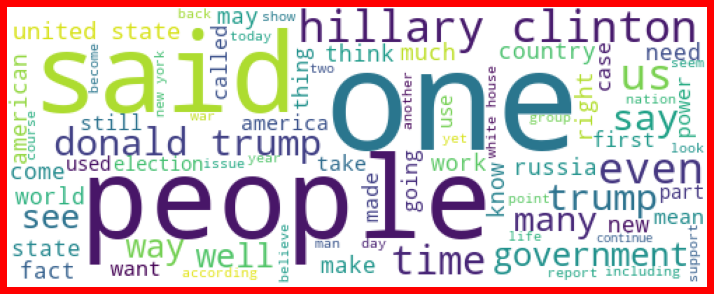

In [15]:
#Getting sense of loud words in fake news 
from wordcloud import WordCloud
for col in news.columns:
    if news[col].dtypes==object:

      fake = news[col][news['label']==1]

      fake_cloud = WordCloud(width=500,height=200,background_color='white',max_words=75).generate(' '.join(fake))

      plt.figure(figsize=(10,8),facecolor='r')
      plt.imshow(fake_cloud)
      plt.axis('off')
      plt.tight_layout(pad=1)
      plt.show()
#first block shows wordcloud for headlines column while second one is for the news

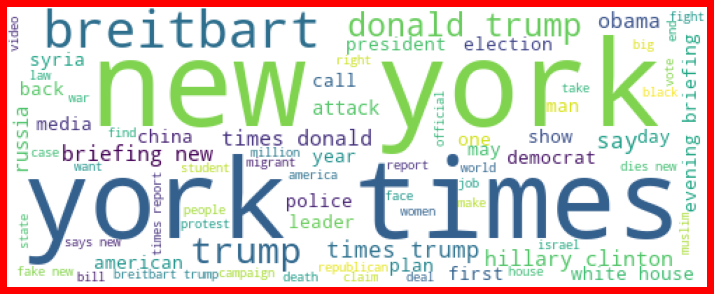

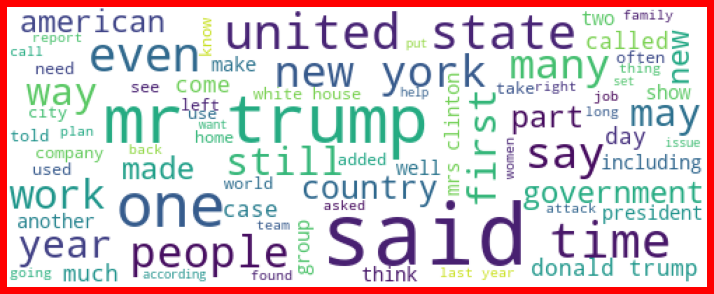

In [16]:
#Getting sense of loud words in genuine news 
from wordcloud import WordCloud
for col in news.columns:
    if news[col].dtypes==object:

      genuine = news[col][news['label']==0]

      gen_cloud = WordCloud(width=500,height=200,background_color='white',max_words=75).generate(' '.join(genuine))

      plt.figure(figsize=(10,8),facecolor='r')
      plt.imshow(gen_cloud)
      plt.axis('off')
      plt.tight_layout(pad=1)
      plt.show()
#first block shows wordcloud for headlines column while second one is for the news

In [17]:
#importing required modelling techniques and metrics for evaluation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,roc_curve
tf_id=TfidfVectorizer()

In [18]:
#seperating input and output variables
list=['headline','news']
for val in list:
  x=tf_id.fit_transform(news[val])

y=news['label']

In [19]:
#creating function for algorithm operations and metrics
def model(alg):
    ml=alg
    ml.fit(x_train,y_train)
    pred=ml.predict(x_test)
    score=ml.score(x_train,y_train)
    print('score=',score)
    print("Accuracy_score",accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [20]:
#Function for roc curve
def roc(alg):
    y_pred_prob=alg.predict_proba(x_test)[:,1]
    fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(fpr,tpr)
    plt.xlabel('False Positive rate')
    plt.ylabel('True Positive rate')
    plt.title(alg)
    plt.show()
    
    roc_score=roc_auc_score(y_test,alg.predict(x_test))
    print('roc_score=',roc_score)

In [21]:
#splitting train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=43)

## Applying Algorithms

#### NaiveBayes-Multinomial

In [22]:
#applying naive bayes
from sklearn.naive_bayes import MultinomialNB
mnb=MultinomialNB()
model(mnb)

score= 0.8861554373522459
Accuracy_score 0.8402579871006449
[[3345   33]
 [1032 2257]]
              precision    recall  f1-score   support

           0       0.76      0.99      0.86      3378
           1       0.99      0.69      0.81      3289

    accuracy                           0.84      6667
   macro avg       0.87      0.84      0.84      6667
weighted avg       0.87      0.84      0.84      6667



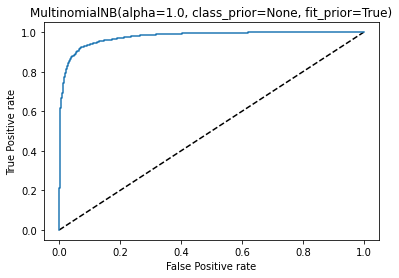

roc_score= 0.8382288612615278


In [23]:
#roc curve and score of the data
roc(mnb)

#### DecisionTreeClassifier

In [24]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
model(dtc)

score= 0.9999261229314421
Accuracy_score 0.8819559022048897
[[2999  379]
 [ 408 2881]]
              precision    recall  f1-score   support

           0       0.88      0.89      0.88      3378
           1       0.88      0.88      0.88      3289

    accuracy                           0.88      6667
   macro avg       0.88      0.88      0.88      6667
weighted avg       0.88      0.88      0.88      6667



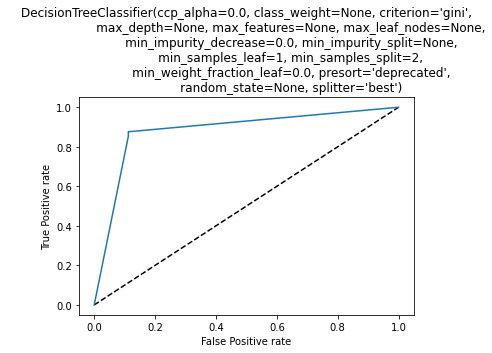

roc_score= 0.8818767854021542


In [25]:
roc(dtc)

#### Random Forest Classifier

In [ ]:
#hyperparameter tuning for best estimators
rfc=RandomForestClassifier()
parameters={'n_estimators':[10,100,500,1000]}
grid=GridSearchCV(rfc,parameters,cv=5)
grid.fit(x,y)
grid.best_params_

{'n_estimators': 1000}

In [28]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=1000)
model(rf)

score= 0.9999261229314421
Accuracy_score 0.9307034648267587
[[3245  133]
 [ 329 2960]]
              precision    recall  f1-score   support

           0       0.91      0.96      0.93      3378
           1       0.96      0.90      0.93      3289

    accuracy                           0.93      6667
   macro avg       0.93      0.93      0.93      6667
weighted avg       0.93      0.93      0.93      6667



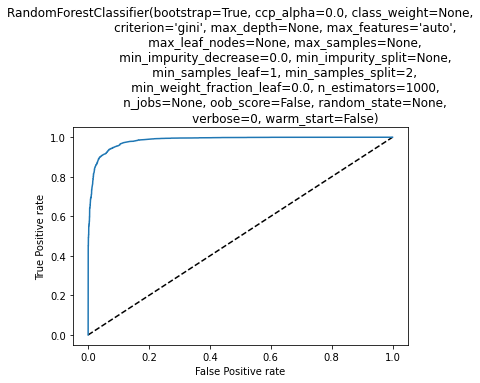

roc_score= 0.930298592955941


In [29]:
roc(rf)

In [31]:
#saving the model
from sklearn.externals import joblib
joblib.dump(rf,'rf_fake_news.pkl')

['rf_fake_news.pkl']

### Conclusion
From all the above algorithms,random forest from ensemble techniques gives the best overall score need to be consider for this dataset.